**Load dataset dan import library**

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Data Mining/Tugas Akhir/adult-depression-lghc-indicator-24.csv')
df.head()

Mounted at /content/drive


,Year,Strata,Strata Name,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
0,2012,Total,Total,1920,NaN,11.74,11.11,12.37
1,2012,Sex,Male,561,1116664.0,8.12,7.32,8.92
2,2012,Sex,Female,1359,2163108.0,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1806371.0,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,222022.0,13.54,10.44,16.65


In [2]:
df.describe()

,Year,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
count,161.00000,161.000000,1.540000e+02,161.000000,161.000000,161.000000
mean,2015.00000,429.776398,8.898917e+05,14.789627,11.955280,17.624224
std,2.00624,390.297867,6.299145e+05,4.589876,3.705456,5.890040
min,2012.00000,28.000000,9.230900e+04,3.970000,2.000000,5.340000
25%,2013.00000,186.000000,4.597088e+05,11.850000,9.650000,13.870000
50%,2015.00000,314.000000,7.164805e+05,14.520000,11.550000,16.930000
75%,2017.00000,511.000000,1.109084e+06,17.190000,14.600000,20.050000
max,2018.00000,1964.000000,3.301418e+06,33.090000,24.600000,44.950000


In [3]:
print(df.isnull().sum())

Year                  0
Strata                0
Strata Name           0
Frequency             0
Weighted Frequency    7
Percent               0
Lower 95% CL          0
Upper 95% CL          0
dtype: int64


In [4]:
print(df.dtypes)

Year                    int64
Strata                 object
Strata Name            object
Frequency               int64
Weighted Frequency    float64
Percent               float64
Lower 95% CL          float64
Upper 95% CL          float64
dtype: object


**Menangani missing values**

In [5]:
# Mengisi missing values dengan rata-rata
df['Weighted Frequency'] = df['Weighted Frequency'].fillna(df['Weighted Frequency'].mean())

**Scatter plot**

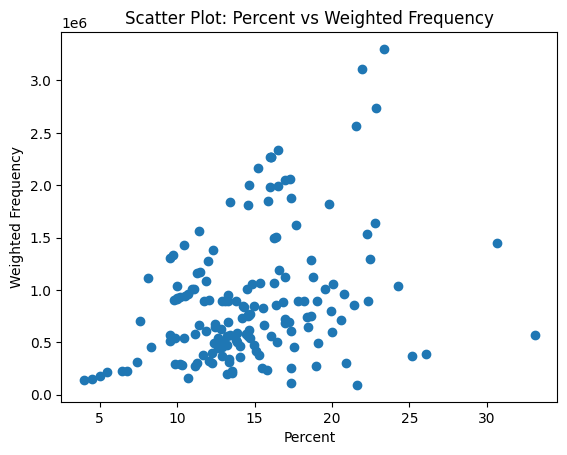

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['Percent'], df['Weighted Frequency'])
plt.xlabel('Percent')
plt.ylabel('Weighted Frequency')
plt.title('Scatter Plot: Percent vs Weighted Frequency')
plt.show()

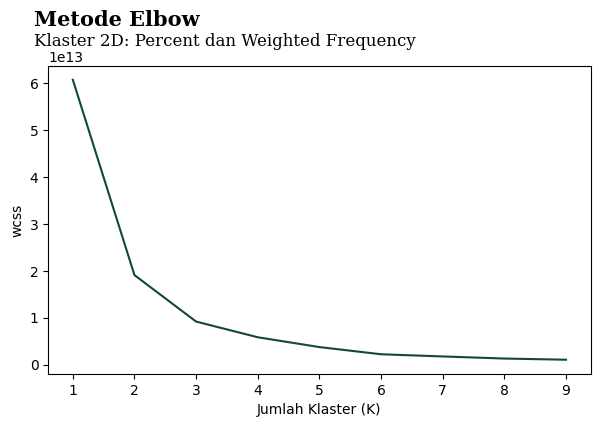

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

x = df.iloc[:, [3, 4]].values

wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

fig, ax = plt.subplots(figsize=(7,4))
fig.text(0.105, .98, 'Metode Elbow', fontsize=15, fontweight='bold',
         fontfamily='serif')
fig.text(0.105, .93, 'Klaster 2D: Percent dan Weighted Frequency',
         fontsize = 12, fontweight = 'light', fontfamily = 'serif')

plt.plot(range(1, 10), wcss, '#114a31')
#plt.title('Metode Elbow', fontsize = 20)
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('wcss')
plt.show()

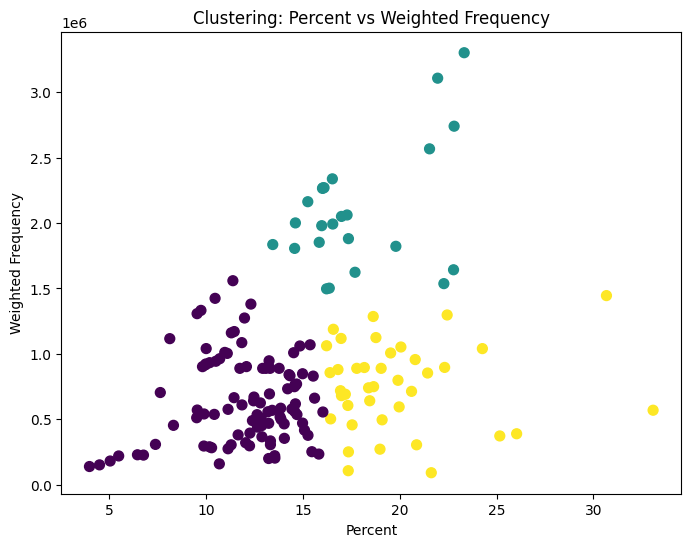

In [8]:
# kolom yang di scale
selected_cols = ['Percent', 'Weighted Frequency']

# objek scaler
scaler = StandardScaler()

# fit scaler pada kolom yang dipilih
df_scaled = scaler.fit_transform(df[selected_cols])

# 4. Clustering dengan k optimal
optimal_k = 3  # Misal hasil dari elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# gunakan scaler untuk klastering data
clusters = kmeans.fit_predict(df_scaled)

# 5. Tambahkan hasil clustering ke dataset
df['Cluster'] = clusters

# 6. Visualisasi cluster
plt.figure(figsize=(8, 6))
plt.scatter(df['Percent'], df['Weighted Frequency'], c=clusters, cmap='viridis', s=50)
plt.title('Clustering: Percent vs Weighted Frequency')
plt.xlabel('Percent')
plt.ylabel('Weighted Frequency')
plt.show()

In [9]:
from sklearn.metrics import silhouette_score

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++',
                      max_iter = 300, n_init = 10, random_state = 0)
    y_means = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, y_means)

    print("Jumlah klaster = ", n_clusters,
         "nilai rata-rata silhouette = ", silhouette_avg)

Jumlah klaster =  3 nilai rata-rata silhouette =  0.5829886893948455
Jumlah klaster =  4 nilai rata-rata silhouette =  0.5702706370200104
Jumlah klaster =  5 nilai rata-rata silhouette =  0.5645748193808787
Jumlah klaster =  6 nilai rata-rata silhouette =  0.5921304833887651


In [10]:
selected_cols = ['Percent', 'Weighted Frequency']
cluster_data = df.loc[:, selected_cols]

kmeans_sel = KMeans(n_clusters = 6, random_state = 0).fit(x)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster = labels)
clustered_data

,Percent,Weighted Frequency,Cluster
0,11.74,8.898917e+05,0
1,8.12,1.116664e+06,5
2,15.25,2.163108e+06,1
3,14.57,1.806371e+06,1
4,13.54,2.220220e+05,4
...,...,...,...
156,17.69,1.623933e+06,1
157,14.56,7.496150e+05,0
158,20.06,1.052945e+06,0
159,21.44,8.542010e+05,0


In [11]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km2 = clustered_data.groupby(['Cluster']).mean().round(1).reset_index()
grouped_km2['Cluster'] = grouped_km2['Cluster'].map(str)
grouped_km2

,Cluster,Percent,Weighted Frequency
0,0,15.0,914289.9
1,1,16.8,1901071.1
2,2,14.5,578703.2
3,3,19.3,2607120.8
4,4,13.0,272387.0
5,5,15.3,1318128.2


In [12]:
# Ganti nama kolom Cluster menjadi lebih deskriptif
df.rename(columns={"Cluster": "Prioritas Intervensi"}, inplace=True)

In [13]:
# Membuat peta label untuk mengganti angka klaster
priority_labels = {
    0: "Prioritas Sangat Rendah",
    1: "Prioritas Rendah",
    2: "Prioritas Sedang",
    3: "Prioritas Tinggi",
    4: "Prioritas Sangat Tinggi",
    5: "Prioritas Ekstrem",
}

# Ganti angka klaster dengan label prioritas
df["Prioritas Intervensi"].map(priority_labels)

,Prioritas Intervensi
0,Prioritas Sangat Rendah
1,Prioritas Sangat Rendah
2,Prioritas Rendah
3,Prioritas Rendah
4,Prioritas Sangat Rendah
...,...
156,Prioritas Rendah
157,Prioritas Sangat Rendah
158,Prioritas Sedang
159,Prioritas Sedang


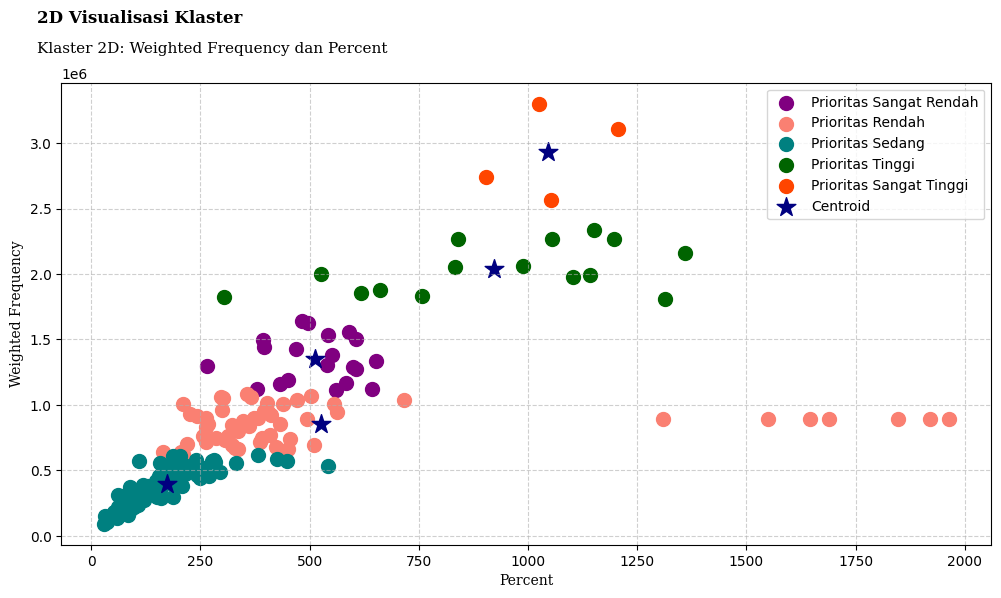

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.text(0.105, .98, '2D Visualisasi Klaster', fontsize=12,
         fontweight='bold', fontfamily='serif')
fig.text(0.105, .93, 'Klaster 2D: Weighted Frequency dan Percent',
         fontsize=11, fontweight='light', fontfamily='serif')

# Nama klaster sesuai dengan prioritas intervensi
priority_labels = {
    0: "Prioritas Sangat Rendah",
    1: "Prioritas Rendah",
    2: "Prioritas Sedang",
    3: "Prioritas Tinggi",
    4: "Prioritas Sangat Tinggi"
}

# Fit k-means clustering
km = KMeans(n_clusters=5, init='k-means++', max_iter=300,
            n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Warna dan label klaster sesuai prioritas
colors = ['purple', 'salmon', 'teal', 'darkgreen', 'orangered']
for cluster_id in range(5):
    plt.scatter(x[y_means == cluster_id, 0], x[y_means == cluster_id, 1],
                s=100, c=colors[cluster_id], label=priority_labels[cluster_id])

# Centroid klaster
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=200, c='navy', marker='*', label='Centroid')

# Label sumbu
plt.xlabel('Percent', fontfamily='serif')
plt.ylabel('Weighted Frequency', fontfamily='serif')

# Legenda dan grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [15]:
# Mapping prioritas intervensi
priority_labels = {
    0: "Prioritas Sangat Rendah",
    1: "Prioritas Rendah",
    2: "Prioritas Sedang",
    3: "Prioritas Tinggi",
    4: "Prioritas Sangat Tinggi"
}

# Mengganti angka klaster dengan nama prioritas
df['Prioritas Intervensi'] = df['Prioritas Intervensi'].map(priority_labels)

# Ringkasan data berdasarkan prioritas intervensi
cluster_summary = df.groupby('Prioritas Intervensi').agg({
    'Percent': 'mean',
    'Weighted Frequency': 'mean'
})

print(cluster_summary)


                           Percent  Weighted Frequency
Prioritas Intervensi                                  
Prioritas Rendah         17.802500        2.087831e+06
Prioritas Sangat Rendah  12.030714        6.495779e+05
Prioritas Sedang         19.868205        7.565634e+05


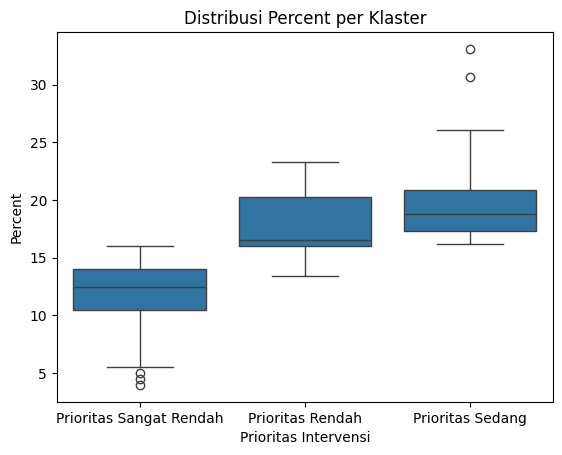

In [16]:
import seaborn as sns
sns.boxplot(x='Prioritas Intervensi', y='Percent', data=df) # Changed 'Cluster' to 'Prioritas Intervensi'
plt.title('Distribusi Percent per Klaster')
plt.show()

In [17]:
cluster_demographic = df.groupby(['Prioritas Intervensi', 'Strata Name']).size()
print(cluster_demographic)

Prioritas Intervensi     Strata Name                            
Prioritas Rendah         18 to 34                                   2
                         College Graduate or Post Grad              2
                         Female                                     7
                         Hispanic                                   2
                         Male                                       2
                         Some College or Tech School                2
                         White                                      7
Prioritas Sangat Rendah  $100,000+                                  7
                         $20,000 - $34,999                          5
                         $35,000 - $49,999                          5
                         $50,000 - $74,999                          5
                         $75,000 - $99,999                          7
                         18 to 34                                   5
                         

In [18]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x, y_means)
print("Silhouette Score:", score)


Silhouette Score: 0.5645748193808787


In [27]:
!pip install streamlit -q

In [28]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Judul aplikasi
st.title("Clustering Depresi: Visualisasi dan Insight")

# Sidebar untuk upload dataset
st.sidebar.header("Upload Dataset")
uploaded_file = st.sidebar.file_uploader("Unggah file CSV", type=["csv"])

if uploaded_file is not None:
    # Membaca dataset
    df = pd.read_csv(uploaded_file)
    st.subheader("Data yang Diunggah")
    st.write(df.head())

    # Menampilkan informasi awal
    st.write("Statistik Dataset")
    st.write(df.describe())

    # Preprocessing (mengatasi missing value)
    if df.isnull().sum().sum() > 0:
        st.warning("Dataset mengandung missing value. Missing value akan diimputasi dengan rata-rata pada kolom numerik.")
        df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

    # Kolom yang akan digunakan untuk clustering
    cols = st.sidebar.multiselect("Pilih kolom untuk clustering", df.columns, default=["Weighted Frequency", "Percent"])

    if len(cols) < 2:
        st.warning("Pilih minimal 2 kolom untuk clustering.")
    else:
        # Standardisasi data
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(df[cols])

        # Elbow Method
        st.subheader("Metode Elbow")
        inertia = []
        k_values = range(1, 11)
        for k in k_values:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(data_scaled)
            inertia.append(kmeans.inertia_)

        # Plot elbow method
        fig, ax = plt.subplots()
        ax.plot(k_values, inertia, marker="o", linestyle="--")
        ax.set_title("Metode Elbow untuk Menentukan Jumlah Klaster")
        ax.set_xlabel("Jumlah Klaster (k)")
        ax.set_ylabel("Inertia")
        st.pyplot(fig)

        # Input jumlah klaster
        k_optimal = st.sidebar.slider("Pilih jumlah klaster", min_value=2, max_value=10, value=3)

        # K-Means Clustering
        kmeans = KMeans(n_clusters=k_optimal, random_state=42)
        clusters = kmeans.fit_predict(data_scaled)

        # Menambahkan kolom klaster ke dataset
        df["Cluster"] = clusters

        # Menampilkan data dengan label klaster
        st.subheader("Hasil Clustering")
        st.write(df.head())

        # Visualisasi 2D Klaster
        st.subheader("Visualisasi 2D Klaster")
        fig, ax = plt.subplots()
        for i in range(k_optimal):
            cluster_data = data_scaled[clusters == i]
            ax.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Klaster {i}")
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="red", label="Centroid")
        ax.set_title("Visualisasi Klaster")
        ax.set_xlabel(cols[0])
        ax.set_ylabel(cols[1])
        ax.legend()
        st.pyplot(fig)

        # Insight
        st.subheader("Insight dan Rekomendasi")
        st.write("**Insight**")
        for i in range(k_optimal):
            cluster_summary = df[df["Cluster"] == i][cols].mean()
            st.write(f"Klaster {i}:")
            st.write(cluster_summary)

        st.write("**Rekomendasi:**")
        st.write("""
        - Fokus pada klaster dengan persentase depresi tinggi untuk intervensi segera.
        - Promosikan pendekatan holistik seperti mindfulness, pola makan sehat, dan aktivitas fisik di klaster dengan risiko tinggi.
        - Lakukan edukasi khusus untuk populasi kecil dengan prevalensi tinggi untuk mencegah peningkatan risiko.
        """)

else:
    st.info("Silakan unggah file CSV untuk memulai analisis.")


Overwriting app.py


In [29]:
!wget -q -O - ipv4.icanhazip.com

34.143.176.54


In [30]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
changed 22 packages in 3s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.176.54:8501

⠼⠴⠦your url is: https://quiet-sites-run.loca.lt
2024-12-19 13:18:31.754 Uncaught exception GET /_stcore/stream (127.0.0.1)
HTTPServerRequest(protocol='http', host='quiet-sites-run.loca.lt', method='GET', uri='/_stcore/stream', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tornado/websocket.py", line 937, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/server/browser_websocket_handler.py", line 126, in open
    self._session_id = self._runtime.connect_session(
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/runtime.py", line 384, in connect_session
    session_id = self._session_mgr.connect_session(
  File 